In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('climate_nasa.csv')

# Preview the first few rows
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [3]:
# Number of rows and columns
print("Dataset shape:", df.shape)

# Data types and non-null counts
df.info()

Dataset shape: (522, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [4]:
# Count of missing values per column
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


In [5]:
# Show column names to catch any hidden issues
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['date', 'likesCount', 'profileName', 'commentsCount', 'text']


In [6]:
# Only for numeric columns
df.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [7]:
# STEP 2: Data Cleaning
# Clean column names
df.columns = df.columns.str.strip()

In [14]:
# Convert 'Date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [15]:
# Check and remove duplicates
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


In [17]:
# Check for nulls again after cleaning
print(df.isnull().sum())

# Optionally drop rows with missing Date or Text
df = df.dropna(subset=['date', 'text'])  # Keep only rows with valid data

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


In [19]:
# Basic text cleaning: lowercase and strip extra whitespace
df['text'] = df['text'].astype(str).str.lower().str.strip()

In [20]:
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,neat comparison i have not heard it before.\n ...
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,an excellent way to visualise the invisible! t...
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,does the co2/ghg in the troposphere affect the...
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! i defo feel the difference - o...
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"yes, and carbon dioxide does not harm the eart..."


In [21]:
print(df['text'].iloc[0])  # Should be lowercase and clean

neat comparison i have not heard it before.
 i would say that co2 is like a disco ball so energy and collide with countless molecules as it bounces around in our atmosphere.


<Figure size 1200x600 with 0 Axes>

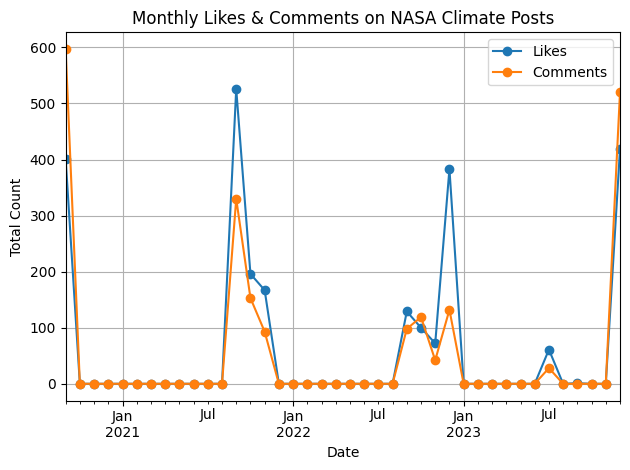

In [ ]:
# STEP 3: Exploratory Data Analysis (EDA)
# STEP 3.1: Likes and Comments Trend Over Time
# Ensure 'date' column is datetime and set as index

# Resample data by month and sum likes/comments
monthly_engagement = df.resample('M').agg({'likesCount': 'sum', 'commentsCount': 'sum'})

# Fill NaNs in commentsCount for plotting
df['commentsCount'] = df['commentsCount'].fillna(0)

# Plot
plt.figure(figsize=(12, 6))
monthly_engagement.plot(kind='line', marker='o')
plt.title("Monthly Likes & Comments on NASA Climate Posts")
plt.xlabel("Date")
plt.ylabel("Total Count")
plt.grid(True)
plt.legend(['Likes', 'Comments'])
plt.tight_layout()
plt.show()

In [25]:
print(df.index)

DatetimeIndex(['2022-09-07 17:12:32+00:00', '2022-09-08 14:51:13+00:00',
               '2022-09-07 17:19:41+00:00', '2022-09-08 00:51:30+00:00',
               '2022-09-07 19:06:20+00:00', '2022-09-15 17:10:57+00:00',
               '2022-09-07 17:31:25+00:00', '2022-09-07 18:07:53+00:00',
               '2022-09-07 22:45:56+00:00', '2022-09-07 16:30:55+00:00',
               ...
               '2022-12-22 17:54:41+00:00', '2022-12-22 17:51:29+00:00',
               '2022-12-22 17:46:40+00:00', '2022-12-22 17:44:23+00:00',
               '2022-12-22 17:41:51+00:00', '2022-12-22 17:21:37+00:00',
               '2022-12-22 17:19:51+00:00', '2022-12-22 17:12:57+00:00',
               '2022-12-22 17:01:12+00:00', '2022-12-22 17:00:08+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=504, freq=None)


In [26]:
# STEP 3.2: Comment Length Analysis
# Step 3.2.1: Add a textLength column
# Make sure 'text' is string and clean
df['text'] = df['text'].astype(str).str.strip().str.lower()

# Add new column: number of characters in each comment
df['textLength'] = df['text'].apply(len)

# View sample
df[['text', 'textLength']].head()

,text,textLength
date,,
2022-09-07 17:12:32+00:00,neat comparison i have not heard it before.\n ...,173
2022-09-08 14:51:13+00:00,an excellent way to visualise the invisible! t...,51
2022-09-07 17:19:41+00:00,does the co2/ghg in the troposphere affect the...,108
2022-09-08 00:51:30+00:00,excellent post! i defo feel the difference - o...,94
2022-09-07 19:06:20+00:00,"yes, and carbon dioxide does not harm the eart...",128


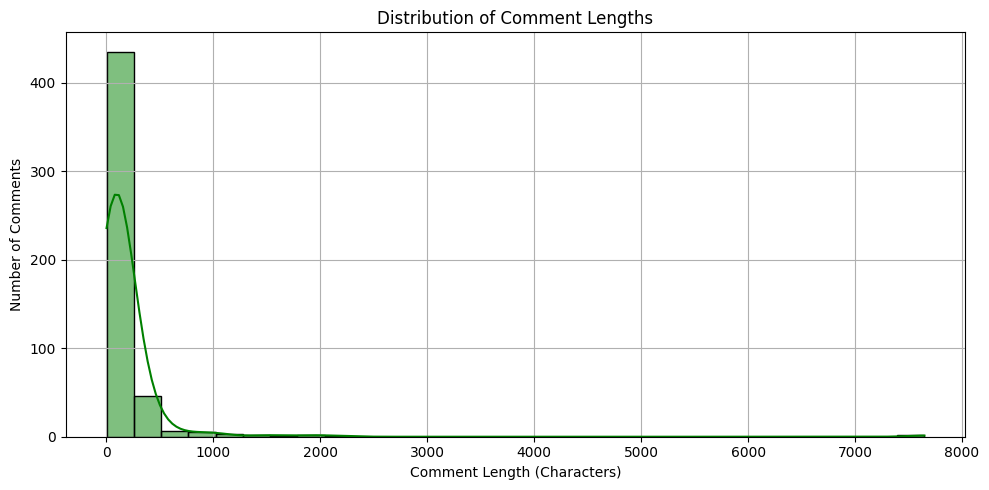

In [27]:
# Step 3.2.2: Plot Distribution of Comment Lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['textLength'], bins=30, kde=True, color='green')
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length (Characters)")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# Step 3.2.3: Correlation with Likes/Comments
# Correlation between text length and engagement
print(df[['textLength', 'likesCount', 'commentsCount']].corr())

               textLength  likesCount  commentsCount
textLength       1.000000    0.016545       0.022837
likesCount       0.016545    1.000000       0.414156
commentsCount    0.022837    0.414156       1.000000


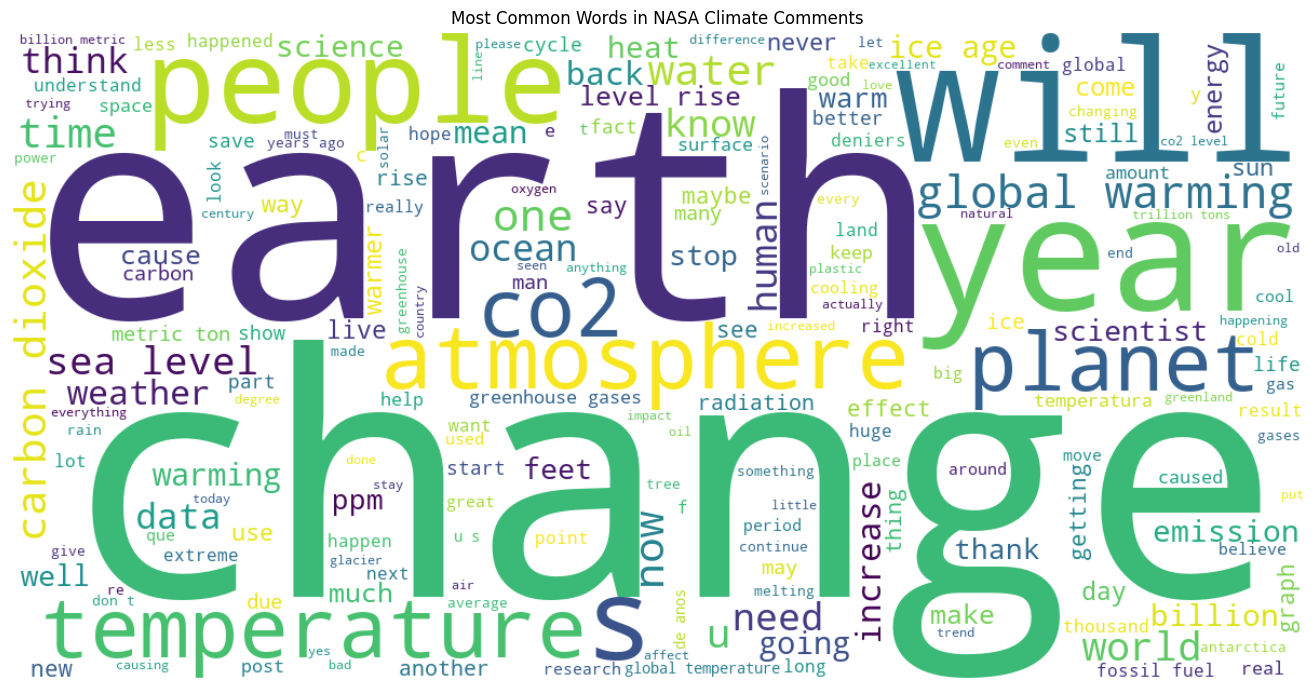

In [29]:
# STEP 3.3: Word Cloud of Most Frequent Words
from wordcloud import WordCloud, STOPWORDS
# Combine all text into one large string
all_text = ' '.join(df['text'].dropna())

# Optional: Define stopwords (custom words you want to exclude)
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'nasa', 'climate'])  # Add any word you want to ignore

# Generate the word cloud
wordcloud = WordCloud(width=1200, height=600,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=True).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in NASA Climate Comments")
plt.tight_layout()
plt.show()

In [31]:
# STEP 4: Sentiment Analysis
# Step 4.1: Using VADER (Best for social media text)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Step 4.1.2: Initialize VADER and Analyze Sentiment
# Create VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to each comment
df['sentiment'] = df['text'].apply(get_sentiment)

# Step 4.1.3: View Sample Results
df[['text', 'sentiment']].sample(5)

,text,sentiment
date,,
2021-09-27 15:22:05+00:00,my question is to nasa. the air in a greenhous...,Negative
2022-09-10 21:41:15+00:00,*********,Neutral
2021-09-23 04:00:16+00:00,from where we can download this data?,Neutral
2020-09-16 09:57:44+00:00,dont agree,Negative
2020-09-16 16:24:50+00:00,isn't it disingenuous to show increase in temp...,Positive


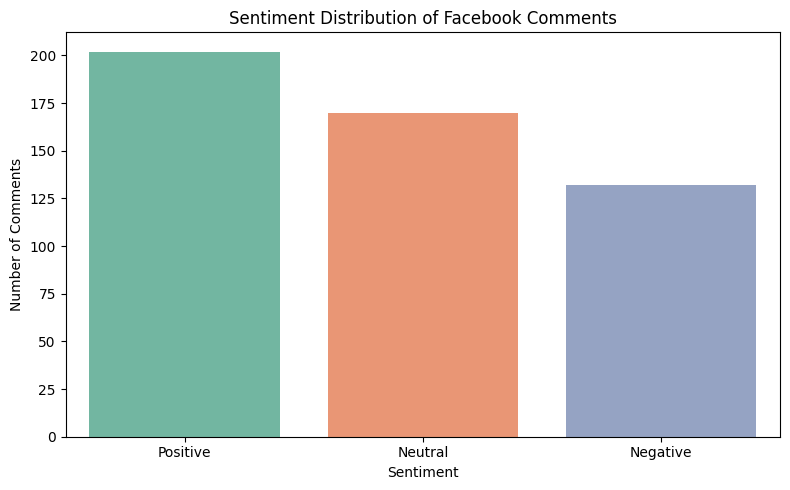

In [32]:
# Step 4.1.4: Visualize Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution of Facebook Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

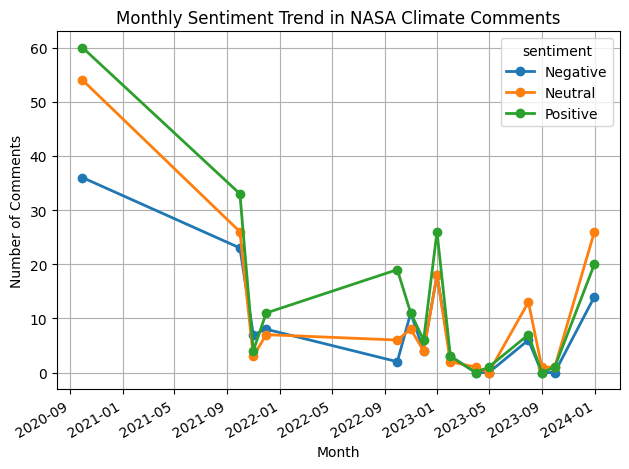

In [33]:
# STEP 4.2: Sentiment Trend Over Time
# Step 4.2.1: Count sentiment per month
# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Count how many Positive/Negative/Neutral comments per month
monthly_sentiment = df.groupby([pd.Grouper(freq='M'), 'sentiment']).size().unstack(fill_value=0)

# Step 4.2.2: Plot Sentiment Trends Over Time
plt.figure(figsize=(14, 6))
monthly_sentiment.plot(marker='o', linewidth=2)
plt.title("Monthly Sentiment Trend in NASA Climate Comments")
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

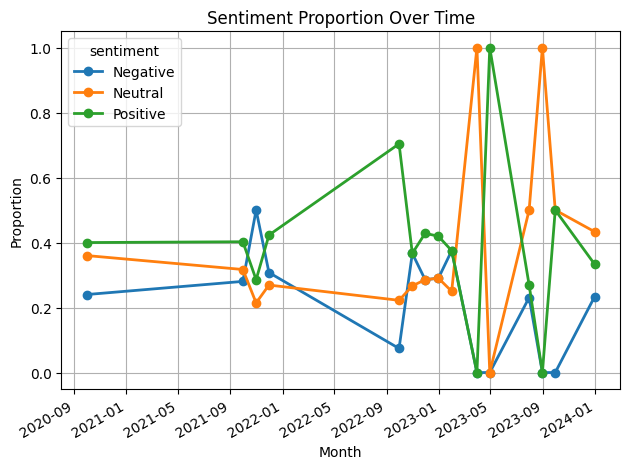

In [34]:
# Step 4.2.3: Optional – Sentiment % Over Time (Normalized)
# Calculate percentage sentiment per month
monthly_sentiment_pct = monthly_sentiment.divide(monthly_sentiment.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(14, 6))
monthly_sentiment_pct.plot(marker='o', linewidth=2)
plt.title("Sentiment Proportion Over Time")
plt.ylabel("Proportion")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# STEP 5: Topic Modeling
# Simple cleaning (lowercase + remove nulls)
df['text'] = df['text'].fillna("").str.lower().str.strip()

In [ ]:
# Create TF-IDF Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9,         # Ignore words that appear in >90% of comments
    min_df=5,           # Ignore rare words (appear in <5 comments)
    stop_words='english',
    max_features=1000   # Limit feature size for clarity
)

tfidf = tfidf_vectorizer.fit_transform(df['text'])

In [ ]:
# Apply NMF (Topic Modeling)
from sklearn.decomposition import NMF

n_topics = 5  # You can try different values
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(tfidf)

NMF(n_components=5, random_state=42)

In [ ]:
# Print Topics and Keywords
feature_names = tfidf_vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {' | '.join(top_words)}")

display_topics(nmf_model, feature_names)

Topic #1: climate | change | data | scientists | human | real | caused | weather | https | does
Topic #2: global | warming | ice | age | don | think | causing | just | science | happen
Topic #3: earth | people | planet | time | co2 | carbon | just | need | atmosphere | heat
Topic #4: nasa | science | thank | post | fake | great | comments | scientists | love | excellent
Topic #5: years | temperature | year | data | ago | graph | like | 10 | start | 140


In [ ]:
# Assign Dominant Topic to Each Comment
# Transform TF-IDF matrix into topic values using the trained NMF model
topic_values = nmf_model.transform(tfidf)
# Assign the topic with highest weight to each comment
df['topic'] = topic_values.argmax(axis=1)

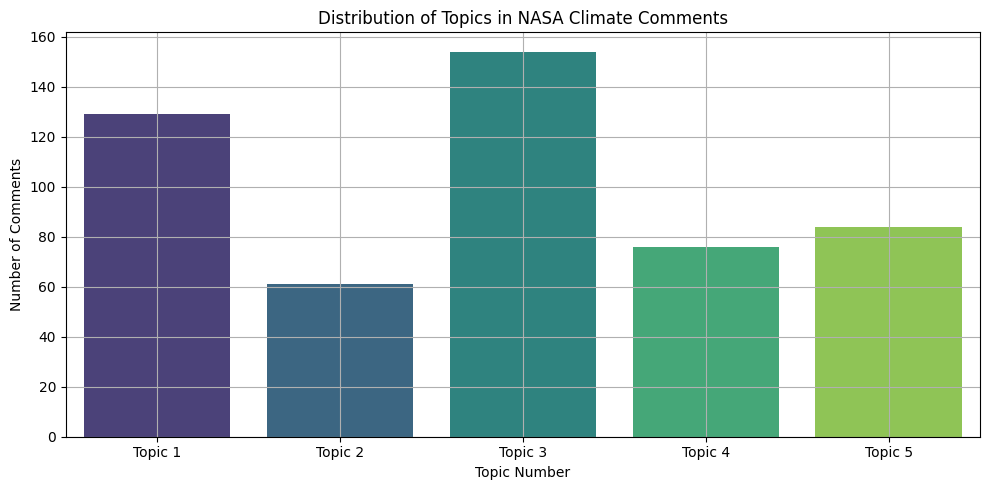

In [50]:
# Visualize Topic Distribution
# Bar Chart of Topic Counts
# Count the number of comments per topic
import matplotlib.pyplot as plt
import seaborn as sns
topic_counts = df['topic'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.title("Distribution of Topics in NASA Climate Comments")
plt.xlabel("Topic Number")
plt.ylabel("Number of Comments")
plt.xticks(ticks=range(len(topic_counts)), labels=[f"Topic {i+1}" for i in topic_counts.index])
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# STEP 6: Engagement Analysis
# Step 6.1: Sentiment vs. Likes & Comments
# Average likes and comments by sentiment
sentiment_engagement = df.groupby('sentiment')[['likesCount', 'commentsCount']].mean().round(2)
print(sentiment_engagement)

           likesCount  commentsCount
sentiment                           
Negative         6.53           5.28
Neutral          2.06           3.32
Positive         6.14           4.21


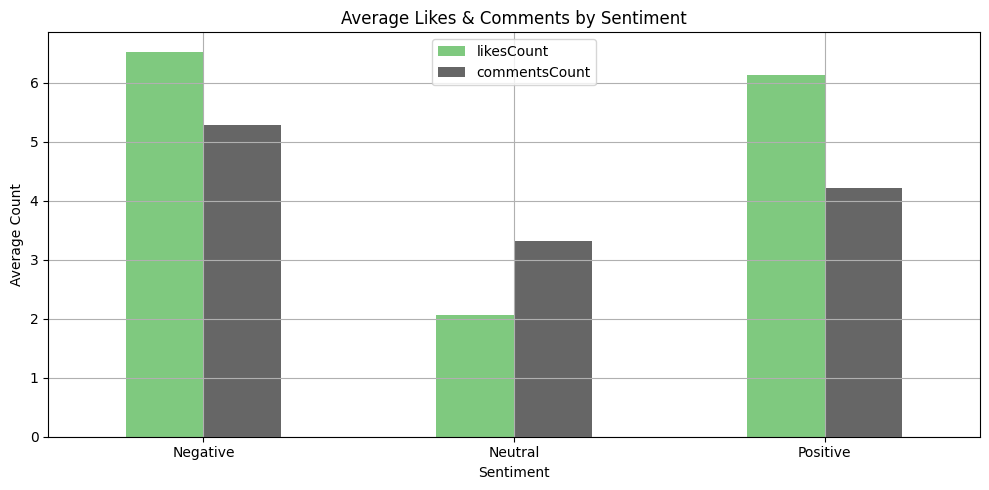

In [52]:
# Step 6.2: Visualize Sentiment Engagement
sentiment_engagement.plot(kind='bar', figsize=(10, 5), colormap='Accent')
plt.title("Average Likes & Comments by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Step 6.3: Topic vs. Engagement
# Average likes/comments per topic
topic_engagement = df.groupby('topic')[['likesCount', 'commentsCount']].mean().round(2)
print(topic_engagement)


       likesCount  commentsCount
topic                           
0            3.22           2.64
1            5.23           4.08
2            4.12           3.82
3            9.80           4.59
4            4.05           6.96


In [54]:
# Step 6.4: Comment Length vs Engagement
# Correlation between text length and likes/comments
print(df[['textLength', 'likesCount', 'commentsCount']].corr())

               textLength  likesCount  commentsCount
textLength       1.000000    0.016545       0.022837
likesCount       0.016545    1.000000       0.414156
commentsCount    0.022837    0.414156       1.000000


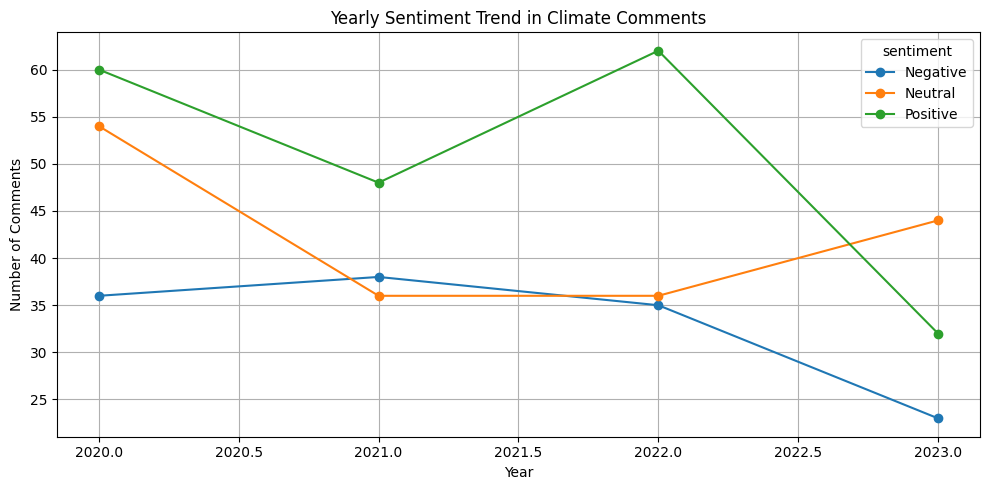

In [56]:
# STEP 7: Trend Analysis
# 7.1: Sentiment Trend Over Time (Yearly)
# Group by year and sentiment
df['year'] = df.index.year
yearly_sentiment = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plot
yearly_sentiment.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Yearly Sentiment Trend in Climate Comments")
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.tight_layout()
plt.show()

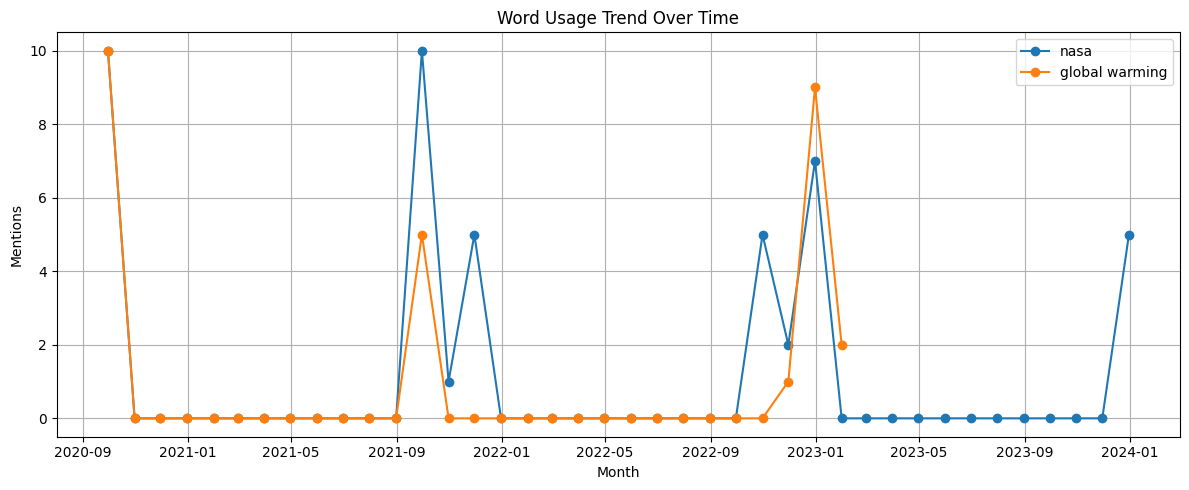

In [57]:
# 7.2: Word Usage Trend (e.g., "nasa", "global warming")
# Function to count word usage per month
def keyword_trend(keyword):
    return df[df['text'].str.contains(keyword, na=False)].resample('M').size()

# Plot trend for keywords
plt.figure(figsize=(12, 5))
plt.plot(keyword_trend('nasa'), label='nasa', marker='o')
plt.plot(keyword_trend('global warming'), label='global warming', marker='o')
plt.title("Word Usage Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Mentions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()